# First Project

## Section Three - Problem no.1: Design a recommendation system

### Adding Libraries

In [59]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
import seaborn as sns

### Importing and checking the data

In [60]:
data = pd.read_csv('../Divar.csv')

C:\Users\Abtin Rahbari\AppData\Local\Temp\ipykernel_21572\2330768946.py:1: DtypeWarning: Columns (11,27,29,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../Divar.csv')


In [61]:
data.head()

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
data.shape

(1000000, 61)

### Preprocessing and Feature engineering

#### Removing the useless Columns

In [63]:
data = data.set_index('Unnamed: 0')
data.index.name = None

In [64]:
data = data.drop(columns=['description', 'title', 'user_type', 'rent_to_single'])

In [65]:
data.head()

,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,rent_mode,rent_value,rent_type,price_mode,price_value,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,NaN,NaN,NaN,مقطوع,8.500000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,مقطوع,26000000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,مقطوع,95000000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,NaN,NaN,NaN,مقطوع,5.750000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Changing the Values of room_count column to be understandable

In [66]:
data['rooms_count'] = data['rooms_count'].replace({
    'بدون اتاق': 0,
    'یک': 1,
    'دو': 2,
    'سه': 3,
    'چهار': 4,
    'پنج یا بیشتر': 5
})

C:\Users\Abtin Rahbari\AppData\Local\Temp\ipykernel_21572\2395350444.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['rooms_count'] = data['rooms_count'].replace({


#### Combining floor count and apt in floors for column reduction

In [ ]:
floors = data['total_floors_count']
floors.fillna('0', inplace=True)
#floors.unique()
floors = floors.replace({
    '30+': 31,
    'unselect': 0   
})
floors = floors.astype('int16')

upf = data['unit_per_floor']    #Units per Floor
upf.fillna('0', inplace=True)
#upf.unique()
upf = upf.replace({
    'more_than_8': 9,
    'unselect': 0   
})
upf = upf.astype('int16')
data['total_units'] = floors * upf
del floors
del upf

In [68]:
data.head()

,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,rent_mode,rent_value,rent_type,price_mode,price_value,...,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius,total_units
0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,...,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0,0
1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,NaN,NaN,NaN,مقطوع,8.500000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,0
2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,مقطوع,26000000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN,0
3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,مقطوع,95000000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,NaN,NaN,NaN,مقطوع,5.750000e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#### Filling the water, gas, electricity, balcony, elevator, warehouse and parking columns and some other datas

In [ ]:
# Correcting the has_balcony column
data.has_balcony = data.has_balcony.replace({
    'true' : True,
    'false' : False, 
    'unselect': np.nan
})
# If they had, they would have mentioned as a plus point. So we count false as default
data.has_balcony = data.has_balcony.fillna(False)

# If they had, they would have said as a plus point. So we count false as default
data.has_elevator = data.has_elevator.fillna(False)

# If they had, they would have said as a plus point. So we count false as default
data.has_warehouse = data.has_warehouse.fillna(False)

# Since it was demanded for every house to have at least one parking, default is set to true
data.has_parking = data.has_parking.fillna(True) 

# Since renovation counts as a good point, not mentioning it would count as False
data.is_rebuilt = data.is_rebuilt.fillna(False)

# it is not rational that the house wasn't mentioned that it doesn't have water, gas or electricity. So we count True as default
data.has_water = data.has_water.fillna(True)
data.has_gas = data.has_gas.fillna(True)
data.has_electricity = data.has_electricity.fillna(True)

# Since we are in Iran, we could assume any house has a single squat toilette :)
data.has_restroom = data.has_restroom.fillna('squat')

# We can mix the pool, jacuzzi and sauna and design a luxury column or even an luxury index.
# The missing values of the columns would be considered zero as default
data.has_jacuzzi = data.has_jacuzzi.fillna(False)
data.has_sauna = data.has_sauna.fillna(False)
data.has_pool = data.has_pool.fillna(False)
data.has_barbecue = data.has_barbecue.fillna(False)
data['luxury_index'] = data['has_pool'].astype('int') + data['has_sauna'].astype('int') + data['has_jacuzzi'].astype('int') + data['has_barbecue'].astype('int')

# Also shoofaj, water_cooler and package can be assumed as the default parameters for heating and cooling systems and warm water system relatively
# because it is most used (in more than have of the available data)
data.has_cooling_system = data.has_cooling_system.fillna('water_cooler')
data.has_heating_system = data.has_heating_system.fillna('shoofaj')
data.has_warm_water_provider = data.has_warm_water_provider.fillna('package')

# Most of our data is Residential so they won't have business deed by defaut
data.has_business_deed = data.has_business_deed.fillna(False)

# Most sells only use single_page deed so we can set it as a default parameter
data.loc[(data['cat2_slug'] == 'residential-sell') | (data['cat2_slug'] == 'commercial-sell'), 'deed_type'] = data.loc[(data['cat2_slug'] == 'residential-sell') | (data['cat2_slug'] == 'commercial-sell'), 'deed_type'].fillna('single_page')
# Most rents only use written_agreement deed so we can set it as a default parameter
data.loc[(data['cat2_slug'] == 'residential-rent') | (data['cat2_slug'] == 'commercial-rent') | (data['cat2_slug'] == 'temporary-rent'), 'deed_type'] = data.loc[(data['cat2_slug'] == 'residential-rent') | (data['cat2_slug'] == 'commercial-rent'), 'deed_type'].fillna('written_agreement')

# I assumed the 30+ floor as 31 and fill the NaN with mean+floor of the available floors
data.floor = data.floor.replace('30+', 31)
data.floor = pd.to_numeric(data.floor, errors='coerce')
data.floor = data.floor.fillna(np.floor(np.nanmean(data.floor)))

# Doing the same with room_count
data.rooms_count = data.rooms_count.fillna(np.floor(np.nanmean(data.rooms_count)))

# Binning and reforming the year column
data.construction_year = data.construction_year.replace(['قبل از ۱۳۷۰', '۱۳۷۱', '۱۳۷۲', '۱۳۷۳', '۱۳۷۴'], 1370)
data.construction_year = data.construction_year.replace(['۱۳۷۵', '۱۳۷۶', '۱۳۷۷', '۱۳۷۸', '۱۳۷۹', '۱۳۸۰', '۱۳۸۱', '۱۳۸۲', '۱۳۸۳', '۱۳۸۴'], 1380)
data.construction_year = data.construction_year.replace(['۱۳۸۵', '۱۳۸۶', '۱۳۸۷', '۱۳۸۸', '۱۳۸۹', '۱۳۹۰', '۱۳۹۱', '۱۳۹۲', '۱۳۹۳', '۱۳۹۴'], 1390)
data.construction_year = data.construction_year.replace(['۱۳۹۵', '۱۳۹۶', '۱۳۹۷', '۱۳۹۸', '۱۳۹۹', '۱۴۰۰', '۱۴۰۱', '۱۴۰۲', '۱۴۰۳'], 1400)

# Filling the missing values of construction year by city and neighborhood mean
mean_const_yr = data.groupby(['city_slug', 'neighborhood_slug']).agg({
    'construction_year': 'mean'
}).reset_index()
# Now we merge the mean data with main data
data = pd.merge(data, mean_const_yr, on=['city_slug', 'neighborhood_slug'], how='left', suffixes=('', '_mean'))
data['construction_year'] = np.floor(data['construction_year'].fillna(data['construction_year_mean']))
del mean_const_yr

C:\Users\Abtin Rahbari\AppData\Local\Temp\ipykernel_21572\4273368612.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.has_balcony = data.has_balcony.fillna(False)
C:\Users\Abtin Rahbari\AppData\Local\Temp\ipykernel_21572\4273368612.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.has_elevator = data.has_elevator.fillna(False)
C:\Users\Abtin Rahbari\AppData\Local\Temp\ipykernel_21572\4273368612.py:14: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.in

In [70]:
data.cat2_slug.unique()

array(['temporary-rent', 'residential-sell', 'residential-rent',
       'commercial-rent', 'commercial-sell', 'real-estate-services'],
      dtype=object)

#### Deleting the used and logically not important columns

In [71]:
data = data.drop(columns=['unit_per_floor', 'total_floors_count', 'floor_material', 'created_at_month'])
# The security guard, barbeque column has 97 percent missing value so we can safely remove them
data = data.drop(columns=['has_security_guard', 'property_type'])
# Engineered a new feature so we can delete these three columns
data = data.drop(columns=['has_jacuzzi', 'has_sauna', 'has_pool', 'has_barbecue'])

# Building direction column is also missing 70 percent of it's data and there is no logical way to determine the missing values, so it will be deleted
data = data.drop(columns=['building_direction'])

# Regular person capacity is somehow useless because it will have data if it's a temporary rent and if it's not, it will have missing data that is 97 percent
data = data.drop(columns=['regular_person_capacity'])

# Same goes for extra person capacity (98 percent missing)
data = data.drop(columns=['extra_person_capacity'])
# since we eliminated this column we can also drop the price of extra person (99 percent missing)
data = data.drop(columns=['cost_per_extra_person'])

#### Trying the location algorithms

In [72]:
# # Extracting all Location datas into another dataset
# loc_data= data[['city_slug', 'neighborhood_slug', 'location_latitude', 'location_longitude']]

In [73]:
# loc_data.info()

In [74]:
# # Filtering the Data *with* lat and long
# df = loc_data[loc_data['location_latitude'].notnull() & loc_data['location_longitude'].notnull()].copy()

# # Separate rows with and without neighborhood labels
# df_known_neigh = df[df['neighborhood_slug'].notnull()]
# df_missing_neigh = df[df['neighborhood_slug'].isnull()]

# # Train a KNN classifier using lat and long as features
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(df_known_neigh[['location_latitude', 'location_longitude']], df_known_neigh['neighborhood_slug'])

# # Predict and fill the missing neighborhood values
# predicted = knn.predict(df_missing_neigh[['location_latitude', 'location_longitude']])

# # Putting it back into loc_data
# loc_data.loc[df_missing_neigh.index, 'neighborhood_slug'] = predicted

In [75]:
# loc_data.info()

In [76]:
# # Designing a function to fill the neighborhood column for rows that only have city data by replacing the NaN data with most frequent neighborhood
# def fill_with_frequent(group):
#     if group.mode().empty:
#         # Doing this to check if we have some cities that do not have any neighborhoods
#         return
#     else:
#         return group.fillna(group.mode().iloc[0])

# loc_data['neighborhood_slug'] = loc_data.groupby('city_slug')['neighborhood_slug'].transform(fill_with_frequent)

In [77]:
# loc_data[loc_data['city_slug'].isna()]

This data has no location Data therefore can't be used in the secondary part of the question. Because of that we delete it

In [78]:
# data = data.drop(loc_data[loc_data['city_slug'].isna()].index)
# loc_data = loc_data.drop(loc_data[loc_data['city_slug'].isna()].index)
# loc_data.info()

Now we fill the lat and long data based on City and Neighborhoods

In [79]:
# # Calculating the center of each neighborhood for lat and long filling 
# centroids = loc_data.groupby(['city_slug', 'neighborhood_slug']).agg({
#     'location_latitude': 'mean',
#     'location_longitude': 'mean'
# }).reset_index()

# # Now we merge the centres with main data
# full_loc = pd.merge(loc_data, centroids, on=['city_slug', 'neighborhood_slug'], how='left', suffixes=('', '_centers'))
# full_loc['location_latitude'] = full_loc['location_latitude'].fillna(full_loc['location_latitude_centers'])
# full_loc['location_longitude'] = full_loc['location_longitude'].fillna(full_loc['location_longitude_centers'])

In [80]:
# full_loc = full_loc.drop(columns=['location_latitude_centers', 'location_longitude_centers'])
# full_loc.info()

In [81]:
# # We still have two neighborhoods that have no location data. Because the count is so little (4 samples) we can delete them
# full_loc = full_loc.drop(full_loc[full_loc['location_latitude'].isna()].index)
# data = data.drop(full_loc[full_loc['location_latitude'].isna()].index)

#### Now that we now that the algorithm works, we execute it on the main dataset

In [ ]:
# Designing a function to fill the neighborhood column for rows that only have city data 
# by replacing the NaN data with most frequent neighborhood
def fill_with_frequent(group):
    if group.mode().empty:
        # Doing this to check if we have some cities that do not have any neighborhoods
        return
    else:
        return group.fillna(group.mode().iloc[0])

# Filtering the Data *with* lat and long
df = data[data['location_latitude'].notnull() & data['location_longitude'].notnull()].copy()

# Separate rows with and without neighborhood labels
df_known_neigh = df[df['neighborhood_slug'].notnull()]
df_missing_neigh = df[df['neighborhood_slug'].isnull()]

# Train a KNN classifier using lat and long as features
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(df_known_neigh[['location_latitude', 'location_longitude']], df_known_neigh['neighborhood_slug'])

# Predict and fill the missing neighborhood values
predicted = knn.predict(df_missing_neigh[['location_latitude', 'location_longitude']])

# Putting it back into loc_data
data.loc[df_missing_neigh.index, 'neighborhood_slug'] = predicted

data['neighborhood_slug'] = data.groupby('city_slug')['neighborhood_slug'].transform(fill_with_frequent)
data = data.drop(data[data['city_slug'].isna()].index)      # Getting rid of data with no location

# Calculating the center of each neighborhood for lat and long filling 
centers = data.groupby(['city_slug', 'neighborhood_slug']).agg({
    'location_latitude': 'mean',
    'location_longitude': 'mean'
}).reset_index()

# Now we merge the centres with main data
data = pd.merge(data, centers, on=['city_slug', 'neighborhood_slug'], how='left', suffixes=('', '_centers'))
data['location_latitude'] = data['location_latitude'].fillna(data['location_latitude_centers'])
data['location_longitude'] = data['location_longitude'].fillna(data['location_longitude_centers'])

data = data.drop(columns=['location_latitude_centers', 'location_longitude_centers'])
data = data.drop(data[data['location_latitude'].isna()].index)
del centers
del df_missing_neigh
del df_known_neigh
del df

#### Completing the cat3 column based on the cat2

In [83]:
data['cat3_slug'] = data.groupby('cat2_slug')['cat3_slug'].transform(fill_with_frequent)

#### Now Let's work on prices

In [84]:
# Let's see what kind of ad we have
data.cat2_slug.unique()

array(['temporary-rent', 'residential-sell', 'residential-rent',
       'commercial-rent', 'commercial-sell', 'real-estate-services'],
      dtype=object)

In [ ]:
# When we have sell -> We go to price value
# When we have non-temporary rent -> we go to transformed credit and rent and make it a full credit
# When we have temporary rent -> we convert the (special + weekend + normal) daily rent into full credit

### For temporary rent
temp_rent = data[data['cat2_slug'] == 'temporary-rent']
# The naming of '_narrow' is because I tried a broader filter first
mean_narrow = temp_rent.groupby(['city_slug', 'neighborhood_slug']).agg({
    'building_size': 'mean',
    'rent_price_on_regular_days': 'mean',
    'rent_price_on_special_days': 'mean',
    'rent_price_at_weekends': 'mean'
}).reset_index()
temp_rent = pd.merge(temp_rent, mean_narrow, on=['city_slug', 'neighborhood_slug'], how='left', suffixes=('', '_mean'))
temp_rent['rent_price_on_regular_days_mean'] = temp_rent['rent_price_on_regular_days_mean'].fillna(0)
temp_rent['rent_price_on_special_days_mean'] = temp_rent['rent_price_on_special_days_mean'].fillna(0)
temp_rent['rent_price_at_weekends_mean'] = temp_rent['rent_price_at_weekends_mean'].fillna(0)
temp_rent['rent_price_on_regular_days'] = temp_rent['rent_price_on_regular_days'].fillna(temp_rent['rent_price_on_regular_days_mean']*temp_rent['building_size']/temp_rent['building_size_mean'])
temp_rent['rent_price_on_special_days'] = temp_rent['rent_price_on_special_days'].fillna(temp_rent['rent_price_on_special_days_mean']*temp_rent['building_size']/temp_rent['building_size_mean'])
temp_rent['rent_price_at_weekends'] = temp_rent['rent_price_at_weekends'].fillna(temp_rent['rent_price_at_weekends_mean']*temp_rent['building_size']/temp_rent['building_size_mean'])
temp_rent = temp_rent.drop(columns=['rent_price_on_regular_days_mean', 'rent_price_on_special_days_mean', 'rent_price_at_weekends_mean'])

# We can drop the rows that lack every data in temporary rent
temp_rent = temp_rent.drop(temp_rent[(data['cat2_slug'] == 'temporary-rent') & ((temp_rent['rent_price_at_weekends'].isna()) & (temp_rent['rent_price_on_regular_days'].isna()) & (temp_rent['rent_price_on_special_days'].isna()))].index)

# Calculating final credit by the assumptions that we have 104 weekends, 13 days for nowruz holidays
# and average of two days per month for holidays and the rest are regular days.
temp_rent['final_credit'] = (((52*2) * temp_rent['rent_price_at_weekends']) + ((13 + (2*11))*temp_rent['rent_price_on_special_days']) + ((365 - ((52*2) + (13 + (2*11))))*temp_rent['rent_price_on_regular_days'])) * 1000000 / 30000
del mean_narrow

C:\Users\Abtin Rahbari\AppData\Local\Temp\ipykernel_21572\201822449.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp_rent = temp_rent.drop(temp_rent[(data['cat2_slug'] == 'temporary-rent') & ((temp_rent['rent_price_at_weekends'].isna()) & (temp_rent['rent_price_on_regular_days'].isna()) & (temp_rent['rent_price_on_special_days'].isna()))].index)


In [86]:
### For rents
rent_data = data[(data['cat2_slug'] == 'residential-rent') | (data['cat2_slug'] == 'commercial-rent')]
rent_data[rent_data.transformable_credit.isna()].shape[0] / rent_data[rent_data.transformable_credit.notna()].shape[0]

0.0029538405607752696

Because we have a lot more data which they have the transformable_credit data, we could remove the ones without that data

In [87]:
rent_data = rent_data[rent_data.transformable_credit.notna()]

Now we calculate the full credit for each one

In [88]:
rent_data.transformable_rent = rent_data.transformable_rent.fillna(0)
rent_data['final_credit'] = rent_data['transformable_credit'] + (rent_data['transformable_rent'] * 1000000 / 30000)

Since we have no more missing data, we move to next groups

In [89]:
### For Sells
sell_data = data[(data['cat2_slug'] == 'residential-sell') | (data['cat2_slug'] == 'commercial-sell')]

This dataset is for selling the property, so lets see what prices are missing

In [90]:
sell_data[sell_data['price_value'].isna()]
# it is observed that some of transformable prices are missing as well, let's check if all of it is missing

,cat2_slug,cat3_slug,city_slug,neighborhood_slug,rent_mode,rent_value,rent_type,price_mode,price_value,credit_mode,...,has_restroom,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius,total_units,luxury_index,construction_year_mean
42,commercial-sell,shop-sell,isfahan,baharestan-esfahan,NaN,NaN,NaN,NaN,NaN,NaN,...,squat,NaN,NaN,NaN,32.484005,51.780560,NaN,0,0,1394.876394
71,residential-sell,plot-old,mohammadieh,abshar,NaN,NaN,NaN,NaN,NaN,NaN,...,squat,NaN,NaN,NaN,36.217232,50.194641,NaN,0,0,NaN
83,commercial-sell,shop-sell,tehran,shahrak-e-kianshahr,NaN,NaN,NaN,NaN,NaN,NaN,...,squat,NaN,NaN,NaN,35.643174,51.442586,NaN,0,0,1390.046729
97,residential-sell,plot-old,sabzevar,abshar,NaN,NaN,NaN,NaN,NaN,NaN,...,squat,NaN,NaN,NaN,36.346432,57.695419,NaN,0,0,NaN
135,residential-sell,plot-old,bushehr,abyari,NaN,NaN,NaN,توافقی,NaN,NaN,...,squat,NaN,NaN,NaN,28.887185,50.907638,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999749,residential-sell,plot-old,shushtar,zeytunkarmandi,NaN,NaN,NaN,NaN,NaN,NaN,...,squat,NaN,NaN,NaN,32.055223,48.837748,NaN,0,0,NaN
999771,commercial-sell,office-sell,kish,azar-isfahan,NaN,NaN,NaN,NaN,NaN,NaN,...,squat,NaN,NaN,NaN,26.532900,53.986202,500.0,0,0,NaN
999805,residential-sell,plot-old,marivan,khorramdasht,NaN,NaN,NaN,NaN,NaN,NaN,...,squat,NaN,NaN,NaN,35.500004,46.188217,NaN,0,0,NaN
999847,commercial-sell,industry-agriculture-business-sell,jiroft,elahiyehblvd,NaN,NaN,NaN,NaN,NaN,NaN,...,squat,NaN,NaN,NaN,28.719998,57.712729,NaN,0,0,NaN


In [91]:
sell_data[(sell_data['price_value'].isna()) & (sell_data['transformable_price'].notna())]
# So we have datas that are missing both raw price and transformable price
# So it's either not a sell data or it's faulty and needs to be removed.
# Let's check their credit feature

,cat2_slug,cat3_slug,city_slug,neighborhood_slug,rent_mode,rent_value,rent_type,price_mode,price_value,credit_mode,...,has_restroom,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius,total_units,luxury_index,construction_year_mean


In [92]:
sell_data[(sell_data['price_value'].isna()) & (sell_data['credit_value'].notna())]

,cat2_slug,cat3_slug,city_slug,neighborhood_slug,rent_mode,rent_value,rent_type,price_mode,price_value,credit_mode,...,has_restroom,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius,total_units,luxury_index,construction_year_mean
18972,commercial-sell,office-sell,tehran,kooy-e-ferdos,مقطوع,28000000.0,rent_credit,NaN,NaN,مقطوع,...,squat,NaN,NaN,NaN,35.724270,51.312950,500.0,0,0,1392.551906
58179,residential-sell,plot-old,mashhad,ghoochan,مقطوع,5000000.0,NaN,NaN,NaN,مقطوع,...,squat,NaN,NaN,NaN,37.118781,58.619115,NaN,0,0,1391.839080
217860,residential-sell,plot-old,shiraz,goldasht-moaliabad,مقطوع,20000000.0,rent_credit,NaN,NaN,مقطوع,...,squat,NaN,NaN,NaN,29.696384,52.431248,500.0,0,0,1391.551247
316527,commercial-sell,shop-sell,tehran,poonak,مقطوع,28000000.0,rent_credit,NaN,NaN,مقطوع,...,squat,NaN,NaN,NaN,35.778557,51.336330,500.0,0,0,1393.315912
432956,residential-sell,plot-old,maragheh,abshar,مجانی,0.0,NaN,NaN,NaN,مقطوع,...,squat,NaN,NaN,NaN,37.363579,46.260643,NaN,0,0,NaN
583381,commercial-sell,shop-sell,urmia,azarbaijan,مقطوع,130000000.0,rent_credit,NaN,NaN,مقطوع,...,squat,NaN,NaN,NaN,37.489708,45.136898,500.0,0,0,NaN


Since there is no Transformable credit for this data, we can assume the mix of rent and credit as their final_credit and add them to rent data

In [93]:
rent_disguise = sell_data[(sell_data['price_value'].isna()) & (sell_data['credit_value'].notna())]
rent_disguise['final_credit'] = rent_disguise['transformable_credit'] + (rent_disguise['transformable_rent'] * 1000000 / 30000)
rent_data = pd.concat([rent_data, rent_disguise], ignore_index=False)

C:\Users\Abtin Rahbari\AppData\Local\Temp\ipykernel_21572\1421306069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_disguise['final_credit'] = rent_disguise['transformable_credit'] + (rent_disguise['transformable_rent'] * 1000000 / 30000)


Now we can move on to our sell data

In [94]:
# Filtering the data to have the ones with either price_value or trandformable_price
sell_data = sell_data[(sell_data['price_value'].notna()) | (sell_data['transformable_price'].notna())]
# This dataset doesn't have any transformable_price so the final price is precieved as price_value
sell_data['final_credit'] = sell_data['price_value']

#### Normalization of sell_data

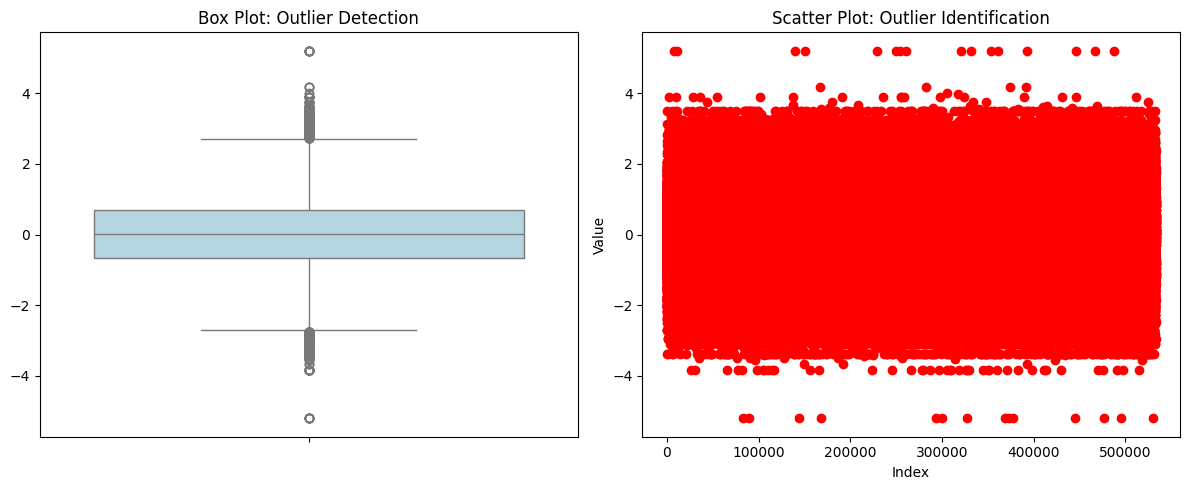

All of sell data:  567086
Filtered sell data:  532834
Detected outliers:  34252


In [95]:
# Filter out all values that are lower than 1 percent and hhigher than 99 percent since we have a lot of anomalies 
upper_threshold = sell_data['final_credit'].quantile(0.98)
lower_threshold = sell_data['final_credit'].quantile(0.04)
filtered_sell_data = sell_data[(sell_data['final_credit'] < upper_threshold) & (sell_data['final_credit'] > lower_threshold)]
sell_outlier = sell_data.shape[0] - filtered_sell_data.shape[0]

# Now we transform the final_credit data into a normal distribution
qt = QuantileTransformer(output_distribution='normal')
transformed_data = qt.fit_transform(filtered_sell_data['final_credit'].to_numpy().reshape(-1, 1))

# Create a figure for multiple plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Box Plot (detect outliers)
sns.boxplot(y=transformed_data.flatten(), ax=axes[0], color='lightblue')
axes[0].set_title("Box Plot: Outlier Detection")

# Scatter Plot (visualize extreme values)
axes[1].scatter(range(len(transformed_data)), transformed_data, color='red')
axes[1].set_title("Scatter Plot: Outlier Identification")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Value")

plt.tight_layout()
plt.show()

# Reporting the data loss
print('All of sell data: ', sell_data.shape[0])
print('Filtered sell data: ', filtered_sell_data.shape[0])      
print('Detected outliers: ', sell_outlier)

#### Normalization of Rent data

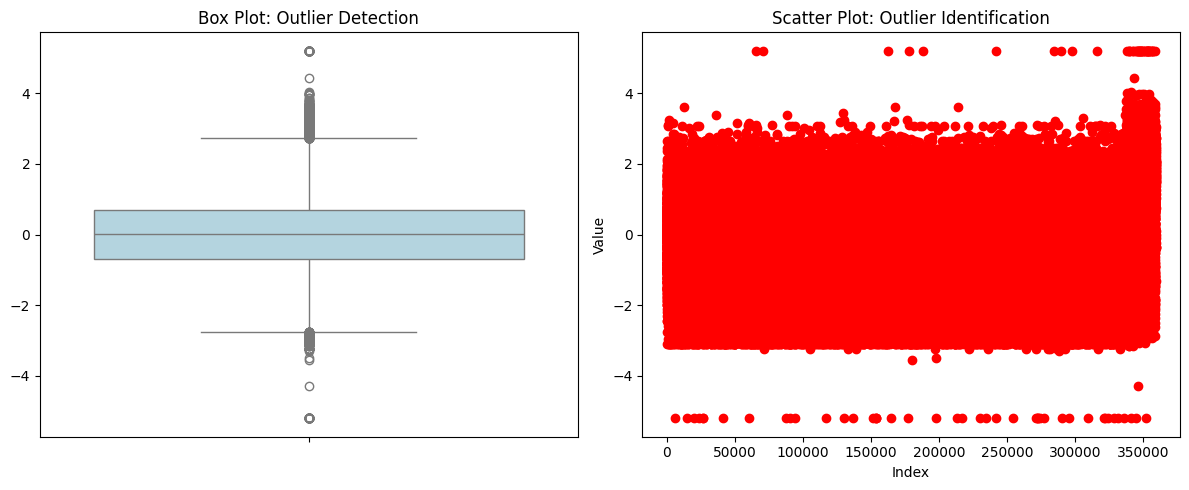

All of sell data:  381993
Filtered sell data:  359049
Detected outliers:  22944


In [96]:
# rent_data
# Combining the temp_rent and rent_data
rent_data = pd.concat([rent_data, temp_rent], ignore_index=False)

# Filter out all values that are lower than 1 percent and hhigher than 99 percent since we have a lot of anomalies 
upper_threshold = rent_data['final_credit'].quantile(0.98)
lower_threshold = rent_data['final_credit'].quantile(0.04)
filtered_rent_data = rent_data[(rent_data['final_credit'] < upper_threshold) & (rent_data['final_credit'] > lower_threshold)]
rent_outlier = rent_data.shape[0]-filtered_rent_data.shape[0]


# Now we transform the final_credit data into a normal distribution
qt = QuantileTransformer(output_distribution='normal')
transformed_data = qt.fit_transform(filtered_rent_data['final_credit'].to_numpy().reshape(-1, 1))

# Create a figure for multiple plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Box Plot (detect outliers)
sns.boxplot(y=transformed_data.flatten(), ax=axes[0], color='lightblue')
axes[0].set_title("Box Plot: Outlier Detection")

# Scatter Plot (visualize extreme values)
axes[1].scatter(range(len(transformed_data)), transformed_data, color='red')
axes[1].set_title("Scatter Plot: Outlier Identification")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Value")

plt.tight_layout()
plt.show()

# Reporting the data loss
print('All of sell data: ', rent_data.shape[0])
print('Filtered sell data: ', filtered_rent_data.shape[0])      
print('Detected outliers: ', rent_outlier)

#### Moving on to next group

In [97]:
### Real State Services
service_data = data[data['cat2_slug']=='real-estate-services']
# This data has no price and limited building area so it seems it is useless

Some memory management

In [ ]:
del rent_data
del temp_rent
del service_data
del rent_disguise
del sell_data

now we only have rent data and sell data, with normalized prices.

#### Finalizing the data ans some more cleaning

In [98]:
final_data = pd.concat([filtered_rent_data, filtered_sell_data], ignore_index=False)
del filtered_sell_data
del filtered_rent_data
del data
final_data = final_data.drop(columns=['rent_mode', 'rent_value', 'rent_type', 'price_mode', 'price_value','credit_mode',
                                      'credit_value', 'rent_credit_transform', 'transformable_price','transformable_credit',
                                      'transformed_credit', 'transformable_rent', 'transformed_rent',
                                      'rent_price_on_regular_days', 'rent_price_on_special_days', 'rent_price_at_weekends',
                                      'location_radius', 'construction_year_mean', 'building_size_mean'])

In [99]:
final_data[final_data.building_size.isna()]

,cat2_slug,cat3_slug,city_slug,neighborhood_slug,land_size,building_size,deed_type,has_business_deed,floor,rooms_count,...,has_electricity,has_gas,has_heating_system,has_cooling_system,has_restroom,location_latitude,location_longitude,total_units,luxury_index,final_credit
38139,commercial-sell,shop-sell,tabriz,abshar,NaN,NaN,single_page,False,2.0,1.0,...,True,True,shoofaj,water_cooler,squat,38.058828,46.298754,0,0,1.600000e+09
64965,residential-sell,house-villa-sell,ahvaz,golestan-ahvaz,NaN,NaN,single_page,False,2.0,1.0,...,True,True,shoofaj,water_cooler,squat,31.297297,48.647404,0,0,2.520000e+10
142777,residential-sell,plot-old,Iranshahr,amiriyeh-mashhad,NaN,NaN,single_page,False,2.0,1.0,...,True,True,shoofaj,water_cooler,squat,27.199144,60.623086,0,0,2.300000e+08
167354,residential-sell,apartment-sell,kermanshah,khorramdasht,NaN,NaN,single_page,False,2.0,1.0,...,True,True,shoofaj,water_cooler,squat,34.380810,47.154987,0,0,6.700000e+09
231124,residential-sell,apartment-sell,tehran,jey,NaN,NaN,single_page,False,2.0,1.0,...,True,True,shoofaj,water_cooler,squat,35.678837,51.357727,0,0,9.700000e+09
309643,residential-sell,plot-old,bushehr,abyari,NaN,NaN,single_page,False,2.0,1.0,...,True,True,shoofaj,water_cooler,squat,28.919380,51.041004,0,0,6.000000e+08
341218,residential-sell,house-villa-sell,zahedan,amiriyeh-mashhad,NaN,NaN,single_page,False,2.0,1.0,...,True,True,shoofaj,water_cooler,squat,29.030228,61.450191,0,0,6.210000e+08
390101,residential-sell,apartment-sell,isfahan,baharestan-esfahan,NaN,NaN,single_page,False,2.0,1.0,...,True,True,shoofaj,water_cooler,squat,32.491802,51.798115,0,0,2.350000e+09
408013,residential-sell,plot-old,lahijan,qiyam,NaN,NaN,single_page,False,2.0,1.0,...,True,True,shoofaj,water_cooler,squat,37.198044,50.007401,0,0,3.000000e+09
458948,residential-sell,house-villa-sell,tehran,makhsous,NaN,NaN,single_page,False,2.0,1.0,...,True,True,shoofaj,water_cooler,squat,35.680759,51.392063,0,0,2.650000e+09


This data doesn't have any land area, building are and it's missing most of it's building year data. Some of very key features. So I delete them.

In [100]:
final_data = final_data[final_data.building_size.notna()]

Since we have building_area we don't really need land_area

In [101]:
final_data = final_data.drop(columns=['land_size'])

We can also fill the construction year with the avg

In [102]:
final_data.construction_year = final_data.construction_year.fillna(np.floor(final_data.construction_year.mean()))

#### Normalization of building_Area

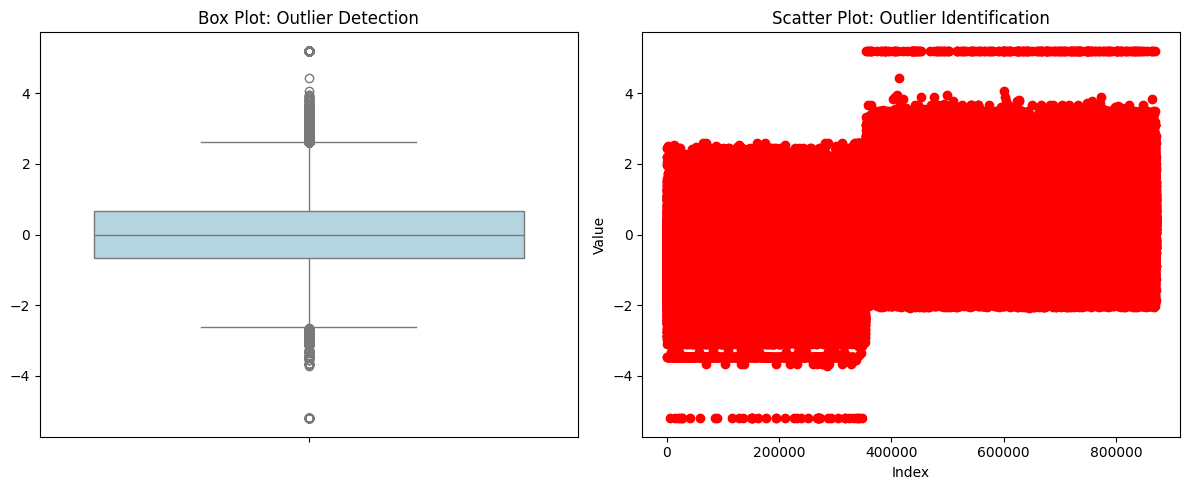

All of sell data:  891855
Filtered sell data:  870740
Detected outliers:  21115


In [103]:
# final_data.building_size

# Filter out all values that are lower than 1 percent and hhigher than 99 percent since we have a lot of anomalies 
upper_threshold = final_data.building_size.quantile(0.98)
# Tunning the lower threshold was crucial because with lower quantile,
# we would have residential ads with 2 square meter that isn't logical
lower_threshold = final_data.building_size.quantile(0.003)
filtered_size_data = final_data[(final_data['building_size'] < upper_threshold) & (final_data['building_size'] > lower_threshold)]
size_outlier = final_data.shape[0]-filtered_size_data.shape[0]


# Now we transform the final_credit data into a normal distribution
qt = QuantileTransformer(output_distribution='normal')
transformed_data = qt.fit_transform(filtered_size_data['final_credit'].to_numpy().reshape(-1, 1))

# Create a figure for multiple plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Box Plot (detect outliers)
sns.boxplot(y=transformed_data.flatten(), ax=axes[0], color='lightblue')
axes[0].set_title("Box Plot: Outlier Detection")

# Scatter Plot (visualize extreme values)
axes[1].scatter(range(len(transformed_data)), transformed_data, color='red')
axes[1].set_title("Scatter Plot: Outlier Identification")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Value")

plt.tight_layout()
plt.show()

# Reporting the data loss
print('All of sell data: ', final_data.shape[0])
print('Filtered sell data: ', filtered_size_data.shape[0])      
print('Detected outliers: ', size_outlier)

In [ ]:
final_data = filtered_size_data
del filtered_size_data
del transformed_data

### Implementing Kmeans

In [ ]:
kmean = KMeans(10, random_state=42)
clusters = kmean.fit_predict(data)